In [34]:
import pandas as pd
from pathlib import Path

In [35]:
# Read stroke data
file_path = Path("resources/Stroke_dataset.csv")

# Read the stroke data from the CSV file
df_stroke = pd.read_csv(file_path)

# Display the first few rows of the dataset
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [36]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [37]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load the dataset
file_path = "resources/Stroke_dataset.csv"
df_stroke = pd.read_csv(file_path)

In [39]:
# 1. Data Preprocessing

# Handle missing values
# Impute missing BMI values with the median value
imputer = SimpleImputer(strategy="median")
df_stroke['bmi'] = imputer.fit_transform(df_stroke[['bmi']])

# Encode categorical columns (e.g., gender, marital status, work type, residence type, smoking status)
label_encoders = {}
for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    le = LabelEncoder()
    df_stroke[column] = le.fit_transform(df_stroke[column])
    label_encoders[column] = le

In [40]:
# 2. Splitting the dataset into training and testing sets
X = df_stroke.drop(columns=['id', 'stroke'])  # Features
y = df_stroke['stroke']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features to bring them to the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# 3. Build the Naive Bayes Model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [42]:
# 4. Evaluate the Model
y_pred = model.predict(X_test_scaled)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# R-squared score 
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 86.79%
R-squared: -1.32
Confusion Matrix:
[[858 102]
 [ 33  29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       960
           1       0.22      0.47      0.30        62

    accuracy                           0.87      1022
   macro avg       0.59      0.68      0.61      1022
weighted avg       0.92      0.87      0.89      1022



In [47]:
# 5. Model Optimization - Hyperparameter Tuning

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Retrain the model with best parameters
optimized_model = GaussianNB(var_smoothing=best_params['var_smoothing'])
optimized_model.fit(X_train_scaled, y_train)

# Evaluate the optimized model
y_pred_optimized = optimized_model.predict(X_test_scaled)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {optimized_accuracy * 100:.2f}%")

# Final R-squared score for optimized model
optimized_r2 = r2_score(y_test, y_pred_optimized)
print(f"Optimized R-squared: {optimized_r2:.2f}")

Best Hyperparameters: {'var_smoothing': 1e-09}
Optimized Accuracy: 86.79%
Optimized R-squared: -1.32


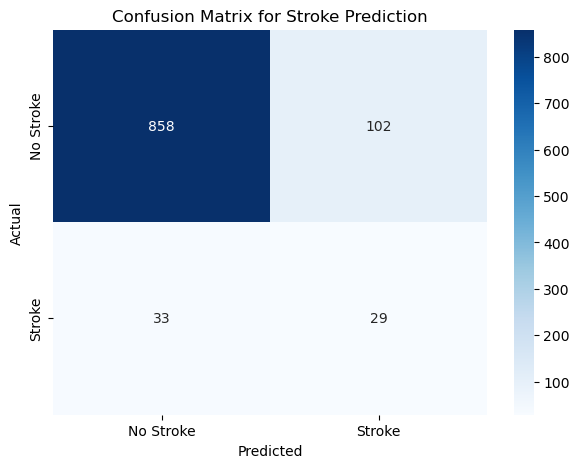

In [44]:
# 6. Model Performance Visualization (Confusion Matrix)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stroke Prediction')
plt.show()

In [45]:
# 7. Save the results in CSV (for iterative tracking of optimization)
results = {
    'Model': ['Initial', 'Optimized'],
    'Accuracy': [accuracy, optimized_accuracy],
    'R-squared': [r2, optimized_r2],
    'Best var_smoothing': [None, best_params['var_smoothing']]
}
results_df = pd.DataFrame(results)
results_df.to_csv("model_optimization_results.csv", index=False)

In [46]:
# Final model performance output
print("Final Model Performance:")
print(results_df)

Final Model Performance:
       Model  Accuracy  R-squared  Best var_smoothing
0    Initial  0.867906  -1.318044                 NaN
1  Optimized  0.867906  -1.318044        1.000000e-09
